In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
patientdata=pd.read_csv('haberman.csv')
patientdata

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


## How many datapoints and features given in data?

In [3]:
# This will give total number of rows and column i.e nothing but number of datapoints and features given in the table.
patientdata.shape


(306, 4)

In [4]:
patientdata.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

# Data Features
1. age-  This is the age of patient at the time of operation
2. year- This is the year of Operation
3. Nodes - Number of positive auxillary nodes detected (numerical), this feature tells about number of cancer cells is present

# Class label- 

## status - This tells about the survival status of patient,
If the status is '1' , then the patient survived 5 years or longer and if the value is 2, then the patient died within 5 years

## OBJECTIVE
From the given data , we have to predict status of the patient from the given three features of new patient .

In [5]:
#(Q) How many data points for each class are present? 
# It tells about how many patient died within 5 years or after 5 years?
patientdata['status'].value_counts()
##Patientdata is a ubalanced dataset as the number of data points for every class is not equal.

1    225
2     81
Name: status, dtype: int64

From the above output , we easily know that 225 patient out of 306 survived 5 years or longer and rest died within 5 years

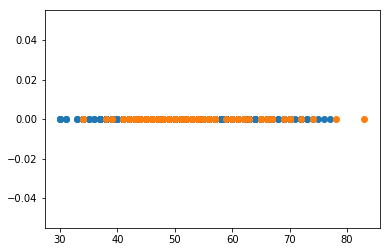

In [6]:
status_1 = patientdata.loc[patientdata["status"] == 1];
status_2 = patientdata.loc[patientdata["status"] == 2];

plt.plot(status_1["age"], np.zeros_like(status_1['age']), 'o')
plt.plot(status_2["age"], np.zeros_like(status_2['age']), 'o')


plt.show()

In the above plot it is very hard to make sense as points are overlapping a lot.

C:\Users\Danish Anwer\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Danish Anwer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


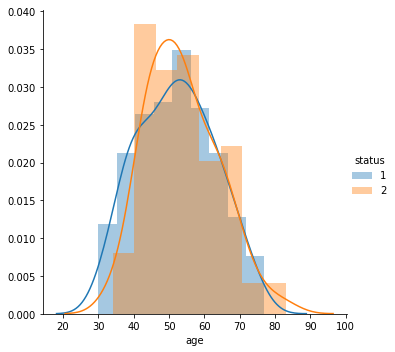

In [7]:
sns.FacetGrid(patientdata, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();


C:\Users\Danish Anwer\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


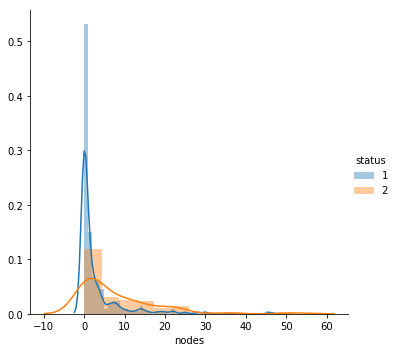

In [8]:
sns.FacetGrid(patientdata, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();


Observation(s)-
1. There are less overlaping of value of nodes of the status 1 and status 2 compare to the other features.


C:\Users\Danish Anwer\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


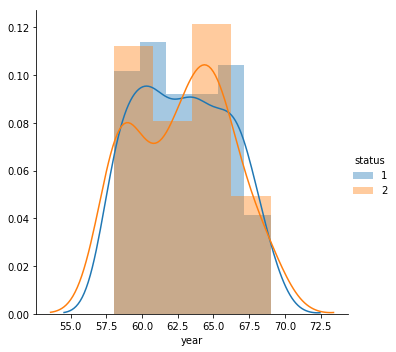

In [9]:
sns.FacetGrid(patientdata, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();


seperating the patients according to the status is not possible in the above plot because PDF of 1 and 2 are not seperable .

## CDF AND PDF

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


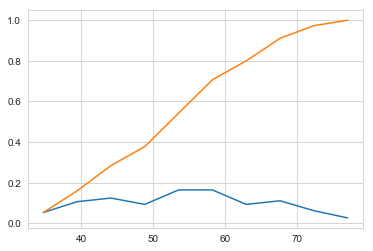

In [15]:
counts, bin_edges = np.histogram(status_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
sns.set_style('whitegrid')
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



From the above CDF plot , we can easily get how many people or percentage of people survived 5 years have age less than particular value.


Eg. 

At y= 0.8 , the value of x is near to 63,

It means that 80% people who survived 5 years have age less than 63 years.

    

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


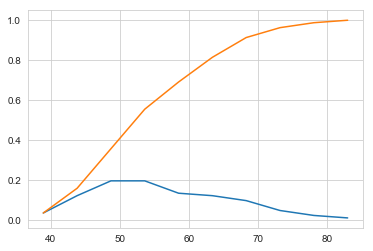

In [16]:
counts, bin_edges = np.histogram(status_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
sns.set_style('whitegrid')
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


## BOXPLOT

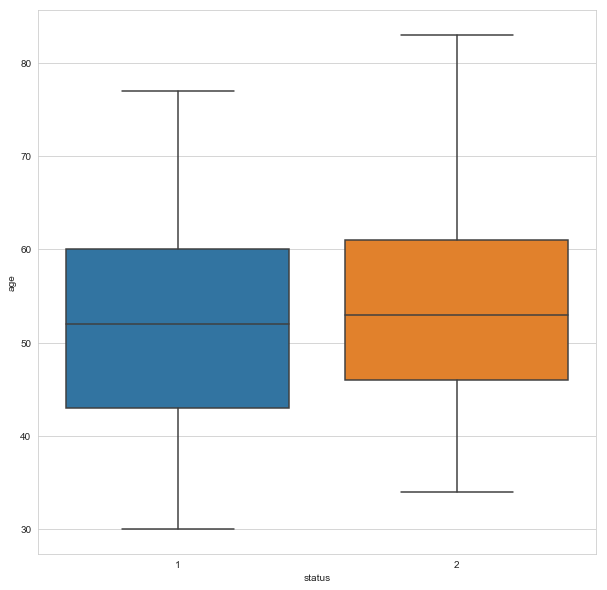

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(ax=ax,x='status',y='age', data=patientdata)
plt.show()

Observations:-

1. 25 percent of the total patients who survived more than 5 years are of age near to 43 or less than 43.
2. 50 percent of the toal patients who survived more than 5 years are of age near to 52 or less than 52.
3. 75 percent of the toal patients who survived more than 5 years are of 60 or less than 60.
4. 25 percent of the total patients who died before 5 years are of age nearly equal to 47 or less than 47.
5. 50 percent of the total patients who died before 5 years are of age nearly equal to 53 or less than 53.
6. 75 percent of the total patients who died before 5 years are of age nearly equal to 61 or less than 61.

This plot helps to know the age at which mmaximum patient died within 5 years or survived along with this it tells how much  are overlapping e

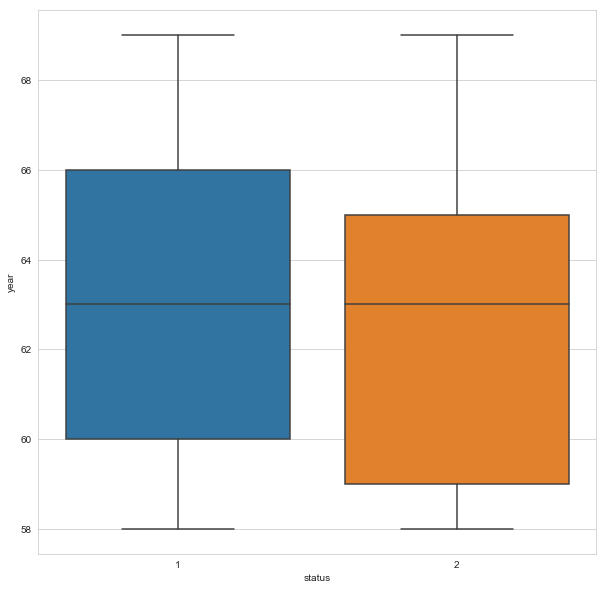

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(ax=ax,x='status',y='year', data=patientdata)
plt.show()

Observation(s):-

1. 25 percent of the total patients who survived more than 5 years are operated in the year 1960 or before that.
2. 50 percent of the toal patients who survived more than 5 years are operated in the year 1963 or before that.
3. 75 percent of the toal patients who survived more than 5 years are operated in the year 1966 or before that.
4. 25 percent of the total patients who died before 5 years are are operated in the year 1960 or before that.
5. 50 percent of the total patients who died before 5 years are are operated in the year 1963 or before that.
6. 75 percent of the total patients who died before 5 years are of are operated in the year 1965 or before that.


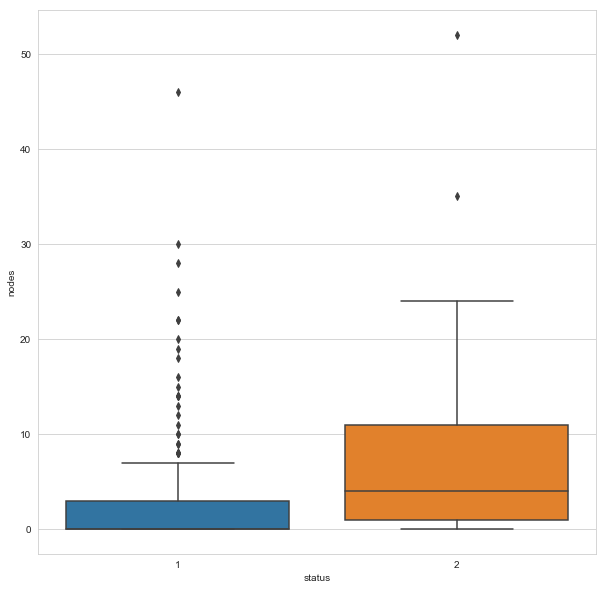

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(ax=ax,x='status',y='nodes', data=patientdata)
plt.show()

Observation(s):-
  1. There are less overlapping of value of nodes of status 1 and status 2 compare to other features.
  

## VIOLIN PLOTS

C:\Users\Danish Anwer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


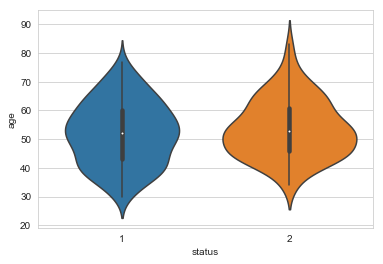

In [24]:
sns.violinplot(x="status", y="age", data=patientdata, size=8)
plt.show()

## CONCLUSION

1. Patient who survived more than 5 years are mostly at the age of between 50 to 60
2. Patient who died within 5 years are mostly at the age of between 45 to 55

# BIVARIATE ANALYSIS

## Scatter plot

C:\Users\Danish Anwer\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


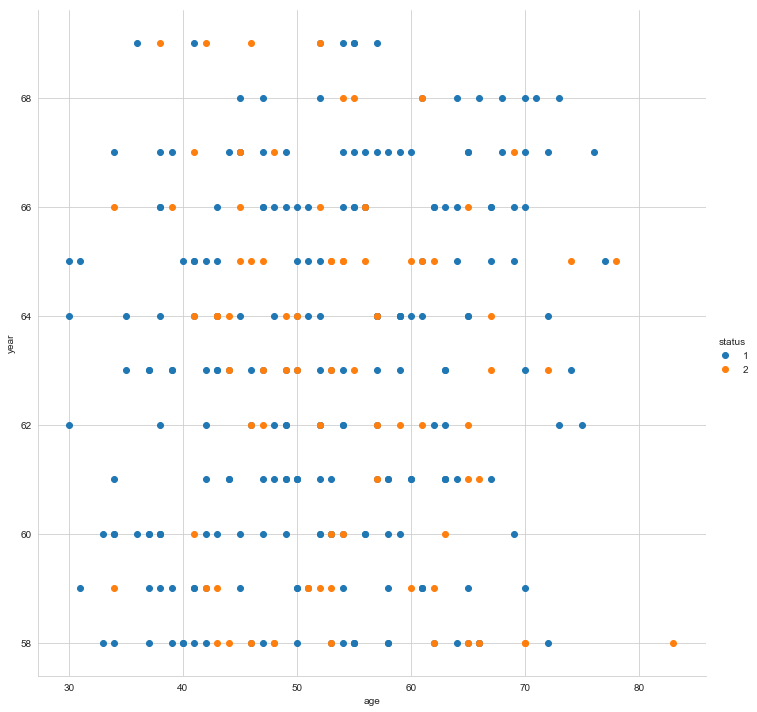

In [27]:
sns.set_style("whitegrid");
sns.FacetGrid(patientdata, hue="status", size=10).map(plt.scatter, "age", "year").add_legend();
plt.show();


Observation(s)-

Using year and age, seperating '1' and '2' is much harder as they have considerable overlap

## PAIR PLOT

C:\Users\Danish Anwer\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


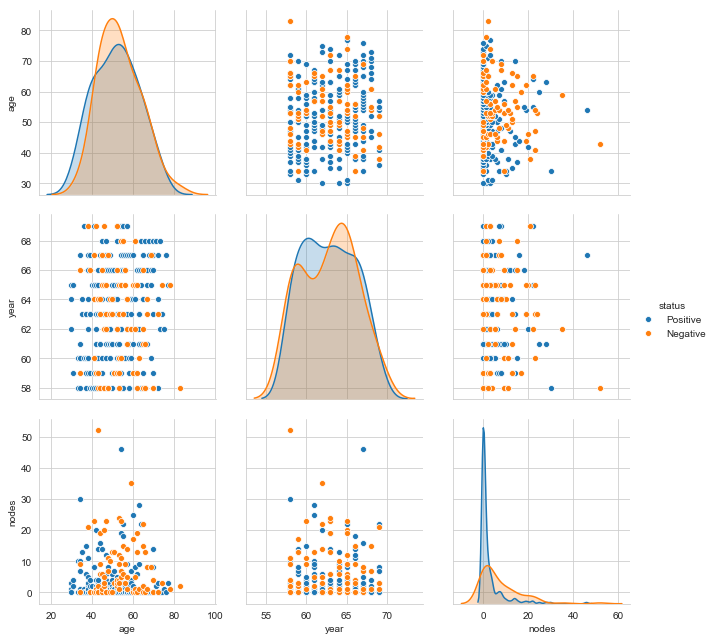

In [37]:
# there are 3 data features so it is better to use pair plot
patientdata['status'] = patientdata['status'].apply(lambda x: 'Positive' if x == 1 else 'Negative')
plt.close()
sns.set_style("whitegrid");
sns.pairplot(patientdata, hue="status", size=3);
plt.show()

Observation(s):-

1.   From pairplot, we can say this is much harder to seperate the datapoints to classify category of status.


Conclusion:-

From the histogram and box plot, I conclude that we can use nodes datapoint to classify category of status, as there is less overlapping of nodes features of status 1 and status 2 compare to other two features.


